<a href="https://colab.research.google.com/github/Priyanshushaw1/ML-assignment/blob/main/Priyanshushaw1/ML-assignment/code/12_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
def build_and_train_model(activation='relu', optimizer='adam', loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(5, input_dim=4, activation=activation))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=300, batch_size=10, verbose=0)

    loss_value, accuracy_value = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n🔹 Activation: {activation}, Optimizer: {optimizer}, Loss: {loss_value:.4f}, Accuracy: {accuracy_value:.4f}")
    return model

In [11]:
model = build_and_train_model()
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: relu, Optimizer: adam, Loss: 0.0530, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: relu, Optimizer: <keras.src.optimizers.adam.Adam object at 0x7d20f858bfe0>, Loss: 0.0171, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


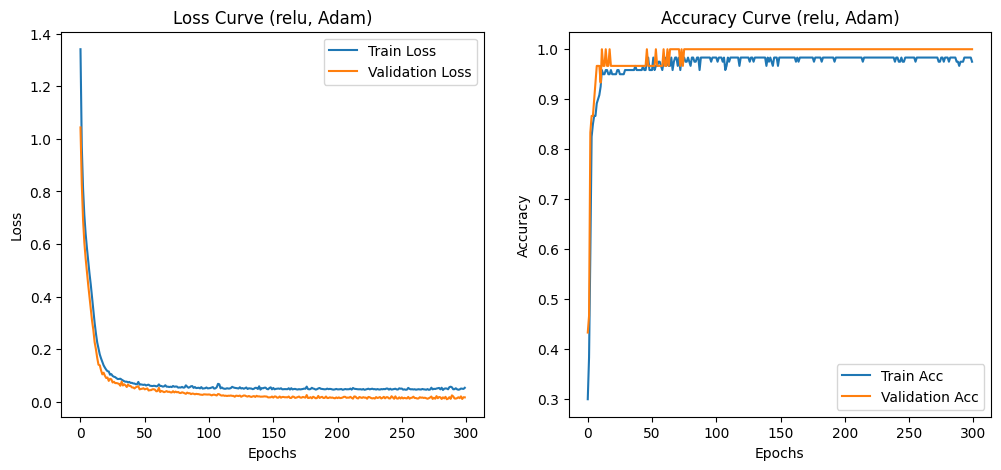

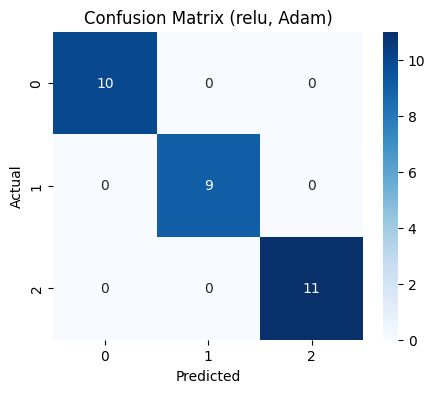


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: sigmoid, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x7d20f8538980>, Loss: 0.0462, Accuracy: 0.9667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


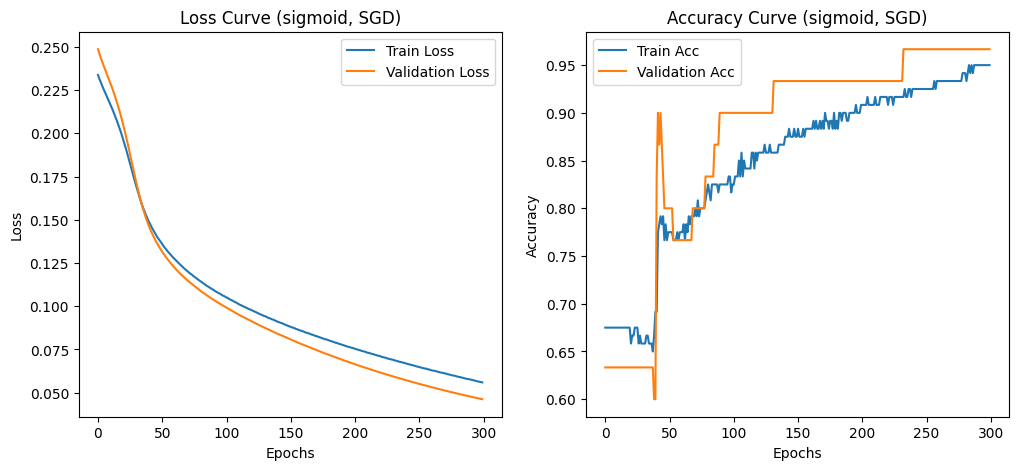

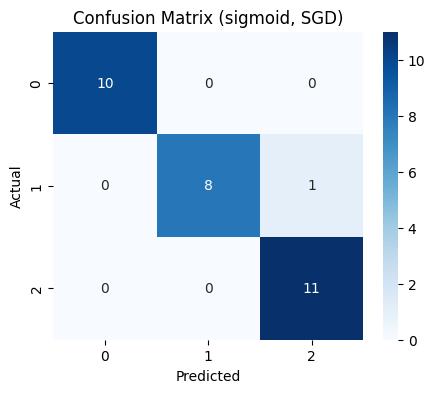


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: tanh, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x7d20d86173e0>, Loss: 0.0893, Accuracy: 0.9667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


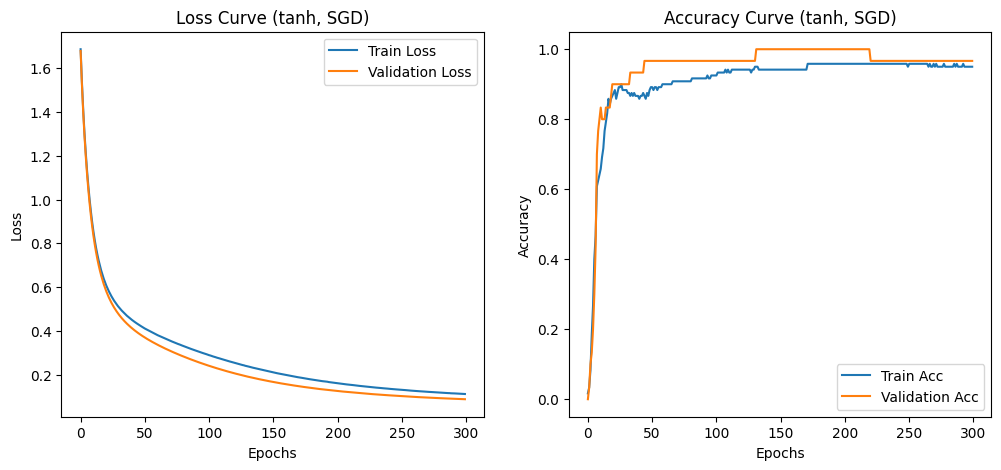

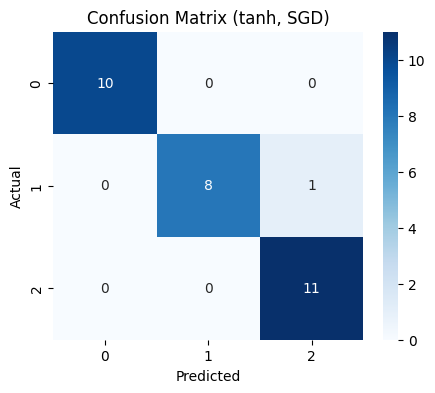


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [14]:
def plot_history_and_confusion_matrix(history, cm, activation, optimizer):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve ({activation}, {optimizer})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'Accuracy Curve ({activation}, {optimizer})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix ({activation}, {optimizer})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    print("\nClassification Report:")
    # Assuming y_true_classes and y_pred_classes are available in the global scope
    print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

# Store results for different configurations
results = {}

# Define different configurations to test
configurations = [
    {'activation': 'relu', 'optimizer': Adam(learning_rate=0.01), 'loss': 'categorical_crossentropy'},
    {'activation': 'sigmoid', 'optimizer': SGD(learning_rate=0.05), 'loss': 'mean_squared_error'},
    {'activation': 'tanh', 'optimizer': SGD(learning_rate=0.01), 'loss': 'categorical_crossentropy'}
]

for config in configurations:
    model = build_and_train_model(activation=config['activation'], optimizer=config['optimizer'], loss=config['loss'])
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Store history and confusion matrix
    results[(config['activation'], config['optimizer'].__class__.__name__)] = {
        'history': model.history,
        'confusion_matrix': cm
    }
    plot_history_and_confusion_matrix(model.history, cm, config['activation'], config['optimizer'].__class__.__name__)